<a href="https://colab.research.google.com/github/Deleon57/EDAR-REGRESSION/blob/main/XGBoost1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
# Data handling
import pandas as pd
import numpy as np

# Train-test split and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost
from xgboost import XGBRegressor


# Original Dataset

In [3]:
# Load ORGINAL dataset
data1 = pd.read_csv("GFI_dataset.csv")

# Quick check
print(data1.head())
print(data1.info())

         Date        Close         High          Low         Open
0  31/12/2012  9091.963867  9151.554951  8999.072886  9104.232763
1  01/01/2013  9091.963867  9091.963867  9091.963867  9091.963867
2  02/01/2013  9323.318359  9325.946504  9043.767691  9151.556707
3  03/01/2013  9335.583984  9376.772209  9183.978625  9289.138496
4  04/01/2013  9049.024414  9131.399905  8955.256723  9113.873744
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3049 non-null   object 
 1   Close   3049 non-null   float64
 2   High    3049 non-null   float64
 3   Low     3049 non-null   float64
 4   Open    3049 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.2+ KB
None


# Check is data is stationary (it is not)

In [4]:
from statsmodels.tsa.stattools import adfuller

# Loop through each feature
for col in ["Close", "High", "Low", "Open"]:
    result = adfuller(data1[col].dropna())
    print(f"Feature: {col}")
    print("  ADF Statistic:", result[0])
    print("  p-value:", result[1])
    print("-" * 40)

Feature: Close
  ADF Statistic: -0.8927524476821448
  p-value: 0.790349769845352
----------------------------------------
Feature: High
  ADF Statistic: -1.129604601213029
  p-value: 0.7031227284341343
----------------------------------------
Feature: Low
  ADF Statistic: -1.0113363349123317
  p-value: 0.7491072102344439
----------------------------------------
Feature: Open
  ADF Statistic: -1.0917706683810122
  p-value: 0.7183424850696943
----------------------------------------


#Method used to make it stationary

In [5]:
import numpy as np

# Apply log returns transformation to all features
for col in ["Close", "High", "Low", "Open"]:
    data1[f"{col}_log_return"] = np.log(data1[col] / data1[col].shift(1))


# Show first 10 rows
data1.head(10)


,Date,Close,High,Low,Open,Close_log_return,High_log_return,Low_log_return,Open_log_return
0,31/12/2012,9091.963867,9151.554951,8999.072886,9104.232763,NaN,NaN,NaN,NaN
1,01/01/2013,9091.963867,9091.963867,9091.963867,9091.963867,0.000000,-0.006533,0.010269,-0.001349
2,02/01/2013,9323.318359,9325.946504,9043.767691,9151.556707,0.025128,0.025410,-0.005315,0.006533
3,03/01/2013,9335.583984,9376.772209,9183.978625,9289.138496,0.001315,0.005435,0.015385,0.014922
4,04/01/2013,9049.024414,9131.399905,8955.256723,9113.873744,-0.031176,-0.026517,-0.025220,-0.019048
5,07/01/2013,9104.234375,9156.813836,9000.826901,9083.202396,0.006083,0.002779,0.005076,-0.003371
6,08/01/2013,8928.092773,9148.052382,8900.926828,9013.973126,-0.019537,-0.000957,-0.011161,-0.007651
7,09/01/2013,9006.959961,9037.631716,8860.612820,9020.981279,0.008795,-0.012144,-0.004539,0.000777
8,10/01/2013,9091.963867,9091.963867,8906.180931,8982.422451,0.009393,0.005994,0.005130,-0.004284
9,11/01/2013,9201.505859,9240.064970,9112.996413,9113.873110,0.011976,0.016158,0.022956,0.014528


In [15]:
# Save the dataset with all variables
data1.to_csv("full_dataset.csv", index=False)

print("CSV file saved as full_dataset.csv")



CSV file saved as full_dataset.csv


# only see the transformed variables

In [6]:
# I did this for at the end to get the data1.
# Drop log return columns (case-sensitive!)
data1 = data1.drop(columns=["Close", "High", "Low", "Open"])

# Check result
print(data1.head(10))




         Date  Close_log_return  High_log_return  Low_log_return  \
0  31/12/2012               NaN              NaN             NaN   
1  01/01/2013          0.000000        -0.006533        0.010269   
2  02/01/2013          0.025128         0.025410       -0.005315   
3  03/01/2013          0.001315         0.005435        0.015385   
4  04/01/2013         -0.031176        -0.026517       -0.025220   
5  07/01/2013          0.006083         0.002779        0.005076   
6  08/01/2013         -0.019537        -0.000957       -0.011161   
7  09/01/2013          0.008795        -0.012144       -0.004539   
8  10/01/2013          0.009393         0.005994        0.005130   
9  11/01/2013          0.011976         0.016158        0.022956   

   Open_log_return  
0              NaN  
1        -0.001349  
2         0.006533  
3         0.014922  
4        -0.019048  
5        -0.003371  
6        -0.007651  
7         0.000777  
8        -0.004284  
9         0.014528  


In [8]:
# Save dataset as CSV
data1.to_csv("stationary_dataset.csv", index=False)

print("Dataset saved as stationary_dataset.csv")


Dataset saved as stationary_dataset.csv


# SAVE THE STATIOANRY DATASET AND UPLOAD SEPERATLY

In [7]:
# Load ORGINAL dataset
stationary_data = pd.read_csv("stationary_dataset.csv")

# Quick check
print(stationary_data.head())
print(stationary_data.info())


         Date  Close_log_return  High_log_return  Low_log_return  \
0  31/12/2012          0.000000         0.000000        0.000000   
1  01/01/2013          0.000000        -0.006533        0.010269   
2  02/01/2013          0.025128         0.025410       -0.005315   
3  03/01/2013          0.001315         0.005435        0.015385   
4  04/01/2013         -0.031176        -0.026517       -0.025220   

   Open_log_return  
0         0.000000  
1        -0.001349  
2         0.006533  
3         0.014922  
4        -0.019048  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3049 non-null   object 
 1   Close_log_return  3049 non-null   float64
 2   High_log_return   3049 non-null   float64
 3   Low_log_return    3049 non-null   float64
 4   Open_log_return   3049 non-null   float64
dtypes: float64(4), object(1)


#Drop the NaN

In [8]:
# Drop the first row
stationary_data = stationary_data.drop(index=0)

# Reset the index after dropping
stationary_data.reset_index(drop=True, inplace=True)

# Show first 10 rows to confirm
stationary_data.head(10)


,Date,Close_log_return,High_log_return,Low_log_return,Open_log_return
0,01/01/2013,0.000000,-0.006533,0.010269,-0.001349
1,02/01/2013,0.025128,0.025410,-0.005315,0.006533
2,03/01/2013,0.001315,0.005435,0.015385,0.014922
3,04/01/2013,-0.031176,-0.026517,-0.025220,-0.019048
4,07/01/2013,0.006083,0.002779,0.005076,-0.003371
5,08/01/2013,-0.019537,-0.000957,-0.011161,-0.007651
6,09/01/2013,0.008795,-0.012144,-0.004539,0.000777
7,10/01/2013,0.009393,0.005994,0.005130,-0.004284
8,11/01/2013,0.011976,0.016158,0.022956,0.014528
9,14/01/2013,0.009479,0.009909,0.014416,0.014320


# Train and split the dataset

In [9]:
# Train: all data before 2023
train = stationary_data[stationary_data["Date"] < "2023-01-01"]

# Test: all data from 2023 onwards
test = stationary_data[stationary_data["Date"] >= "2023-01-01"]

# Define features (X) and target (y) using log-returns
X_train = train[["High_log_return", "Low_log_return", "Open_log_return"]]
y_train = train["Close_log_return"]

X_test = test[["High_log_return", "Low_log_return", "Open_log_return"]]
y_test = test["Close_log_return"]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)



Train shape: (2011, 3) (2011,)
Test shape: (1037, 3) (1037,)


# Create the XGBoost model

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=500,        # number of boosting rounds
    learning_rate=0.05,      # step size shrinkage
    max_depth=5,             # depth of each tree
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42
)

In [12]:
# Fit the model on training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

RMSE: 0.018197579905871432
R^2 Score: 0.6776069576019952


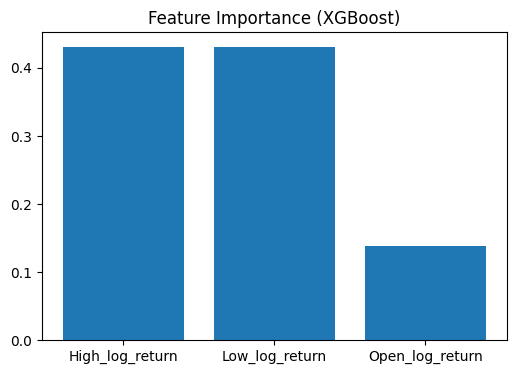

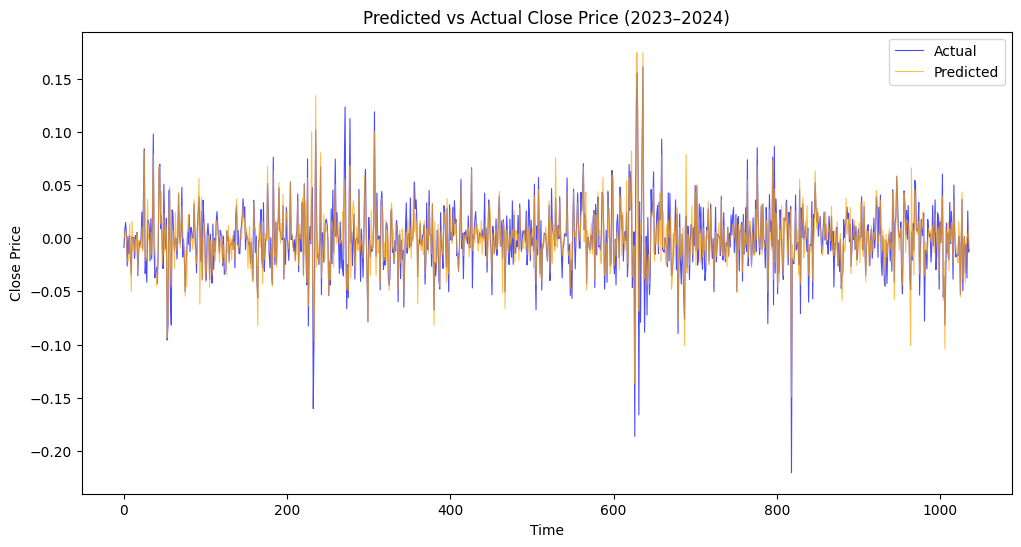

In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=500,       # number of boosting rounds
    learning_rate=0.05,     # step size shrinkage
    max_depth=5,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    random_state=42
)

# 2. Fit model
xgb_model.fit(X_train, y_train)

# 3. Predictions on test set
y_pred = xgb_model.predict(X_test)

# 4. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
r2 = r2_score(y_test, y_pred)                       # R^2 score

print("RMSE:", rmse)
print("R^2 Score:", r2)

# 5. Feature importance
plt.figure(figsize=(6,4))
plt.bar(X_train.columns, xgb_model.feature_importances_)
plt.title("Feature Importance (XGBoost)")
plt.show()

# 6. Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7, linewidth=0.8)
plt.plot(y_pred, label="Predicted", color="orange", alpha=0.7, linewidth=0.8)
plt.legend()
plt.title("Predicted vs Actual Close Price (2023–2024)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()


# Learning Curve

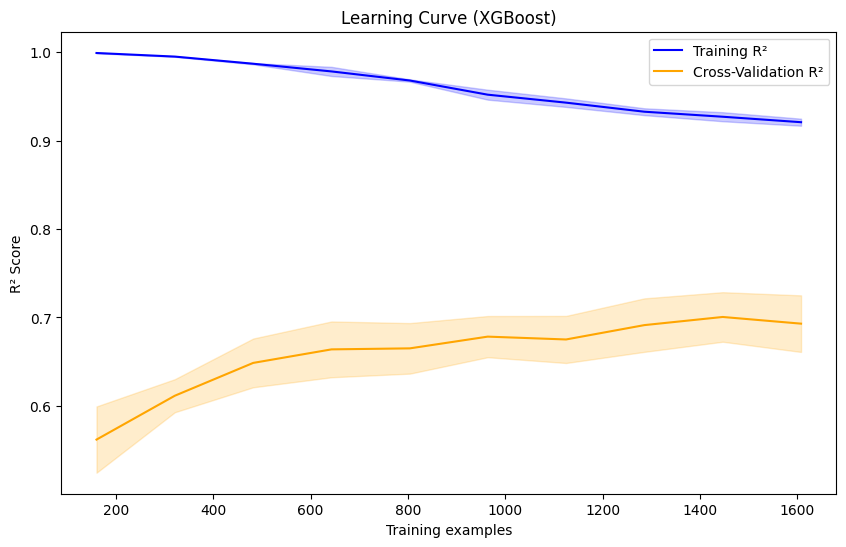

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define model
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=5,                      # 5-fold cross validation
    scoring="r2",              # use R² score
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label="Training R²", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation R²", color="orange")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="orange")

plt.title("Learning Curve (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.show()


# Actual vs the Forecasted values as stationary Data

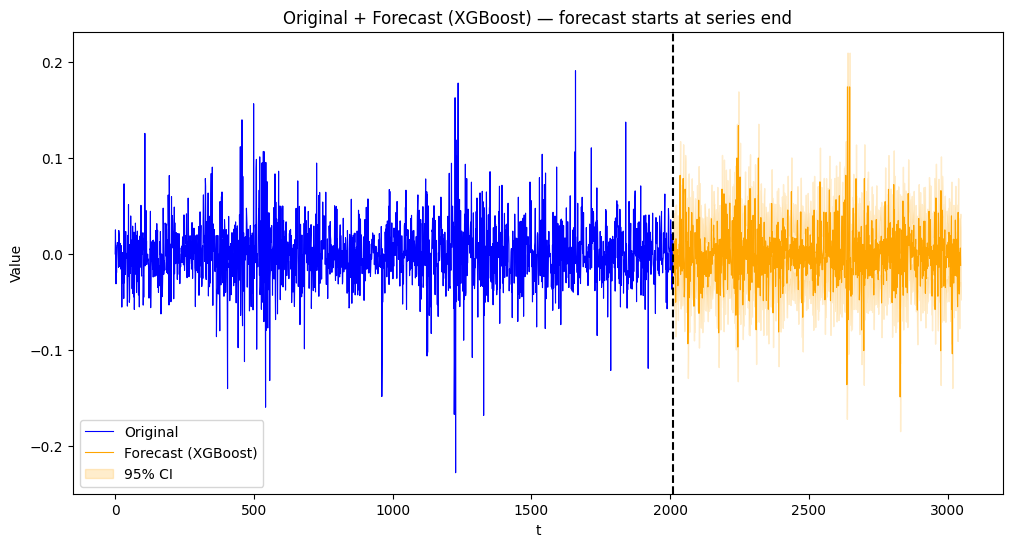

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Forecast index aligned with test set
x_forecast = np.arange(len(y_test)) + len(y_train)

# Estimate 95% CI from prediction errors
error = np.std(y_test.values - y_pred)
lower = y_pred - 1.96 * error
upper = y_pred + 1.96 * error

# Plot Original (Train) + Forecast (Test)
plt.figure(figsize=(12,6))

# Training data (blue)
plt.plot(range(len(y_train)), y_train.values, label="Original", color="blue", linewidth=0.8)

# Forecast (orange)
plt.plot(x_forecast, y_pred, label="Forecast (XGBoost)", color="orange", linewidth=0.8)

# Confidence Interval
plt.fill_between(x_forecast, lower, upper, color="orange", alpha=0.2, label="95% CI")

# Vertical line at boundary
plt.axvline(x=len(y_train), color="k", linestyle="--")

# Labels and legend
plt.title("Original + Forecast (XGBoost) — forecast starts at series end")
plt.xlabel("t")
plt.ylabel("Value")
plt.legend()
plt.show()


# Confusion matrix against the Confidence Interval

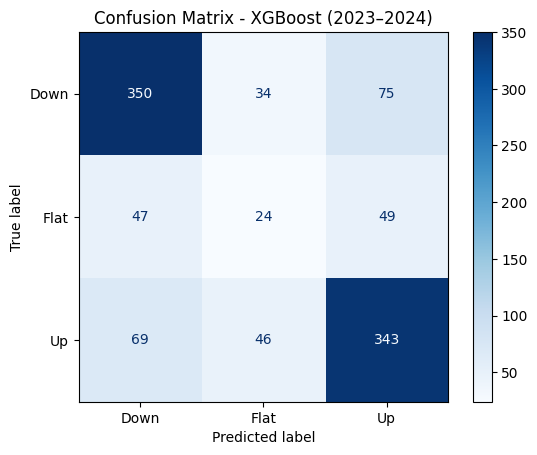

Classification Report - XGBoost
              precision    recall  f1-score   support

        Down       0.75      0.76      0.76       459
        Flat       0.23      0.20      0.21       120
          Up       0.73      0.75      0.74       458

    accuracy                           0.69      1037
   macro avg       0.57      0.57      0.57      1037
weighted avg       0.68      0.69      0.69      1037



In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Ensure arrays ---
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# --- 2. Convert regression outputs into classes ---
def to_class(delta, eps=None):
    """
    Convert price changes into classes:
    +1 = up, -1 = down, 0 = flat (within epsilon threshold)
    """
    if eps is None:
        eps = 0.1 * np.std(delta)   # threshold based on std
    cls = np.zeros_like(delta, dtype=int)
    cls[delta > eps] = 1    # Up
    cls[delta < -eps] = -1  # Down
    return cls

# --- 3. Compute daily differences ---
delta_true = np.diff(y_test, prepend=y_test[0])
delta_pred = np.diff(y_pred, prepend=y_pred[0])

# --- 4. Convert differences to classes ---
true_cls = to_class(delta_true)
pred_cls = to_class(delta_pred)

# --- 5. Confusion Matrix ---
labels = [-1, 0, 1]
cm = confusion_matrix(true_cls, pred_cls, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Down", "Flat", "Up"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost (2023–2024)")
plt.show()

# --- 6. Classification Report ---
print("Classification Report - XGBoost")
print(classification_report(true_cls, pred_cls, target_names=["Down", "Flat", "Up"]))


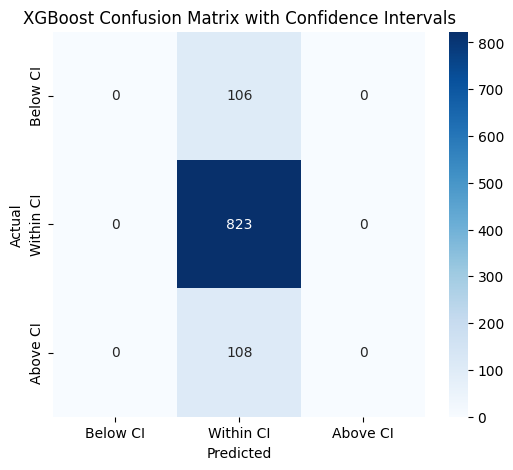

              precision    recall  f1-score   support

    Below CI       0.00      0.00      0.00       108
   Within CI       0.00      0.00      0.00       106
    Above CI       0.79      1.00      0.88       823

    accuracy                           0.79      1037
   macro avg       0.26      0.33      0.29      1037
weighted avg       0.63      0.79      0.70      1037



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Pred Below CI,Pred Within CI,Pred Above CI
True Below CI,0,106,0
True Within CI,0,823,0
True Above CI,0,108,0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# --- 1. Fit model ---
xgb_model.fit(X_train, y_train)

# --- 2. Predictions on test set ---
y_pred = xgb_model.predict(X_test)

# --- 3. Compute residuals from training set to estimate sigma ---
residuals = y_train - xgb_model.predict(X_train)
sigma = np.std(residuals)

# --- 4. Build 95% confidence intervals for each prediction ---
ci_lower = y_pred - 1.96 * sigma
ci_upper = y_pred + 1.96 * sigma

# --- 5. Classify ACTUAL values relative to CI ---
y_test_class = []
for actual, low, high in zip(y_test, ci_lower, ci_upper):
    if low <= actual <= high:
        y_test_class.append("Within CI")
    elif actual < low:
        y_test_class.append("Below CI")
    else:
        y_test_class.append("Above CI")

# --- 6. Classify PREDICTED values relative to their own CI ---
y_pred_class = []
for pred, low, high in zip(y_pred, ci_lower, ci_upper):
    if low <= pred <= high:
        y_pred_class.append("Within CI")
    elif pred < low:
        y_pred_class.append("Below CI")
    else:
        y_pred_class.append("Above CI")

# --- 7. Confusion Matrix ---
labels = ["Below CI", "Within CI", "Above CI"]
cm = confusion_matrix(y_test_class, y_pred_class, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix with Confidence Intervals")
plt.show()

# --- 8. Classification Report ---
print(classification_report(y_test_class, y_pred_class, target_names=labels))

# --- 9. (Optional) Pretty display as DataFrame like your KNN/RF example ---
cm_df = pd.DataFrame(cm, index=[f"True {lbl}" for lbl in labels],
                     columns=[f"Pred {lbl}" for lbl in labels])
display(cm_df)


# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Make predictions with your regression model
y_pred = xgb_model.predict(X_test)

# 2. Define a binary target from regression actuals
# Example: classify as 1 if return > 0, else 0
y_test_binary = (y_test > 0).astype(int)

# 3. Use regression predictions as scores for ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)

# 4. Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Regression treated as classifier)")
plt.legend(loc="lower right")
plt.show()



# Reverse engineering the Forecasted values

In [ ]:
import numpy as np
import pandas as pd

# 1. Convert Date to datetime
stationary_data["Date"] = pd.to_datetime(stationary_data["Date"], dayfirst=True)
data1["Date"] = pd.to_datetime(data1["Date"], dayfirst=True)

# 2. Filter stationary dataset for 2023–2024 only
stationary_filtered = stationary_data[
    (stationary_data["Date"] >= "2023-01-01") & (stationary_data["Date"] <= "2024-12-31")
].copy()

# 3. Get the last actual values from original dataset before 2023
last_row_2022 = data1[data1["Date"] < "2023-01-01"].iloc[-1]

first_values = {
    "Close_log_return": last_row_2022["Close"],
    "High_log_return":  last_row_2022["High"],
    "Low_log_return":   last_row_2022["Low"],
    "Open_log_return":  last_row_2022["Open"]
}

# 4. Reconstruct 2023–2024 data
for log_col, first_val in first_values.items():
    new_col = log_col.replace("_log_return", "")  # Close, High, Low, Open
    stationary_filtered[new_col] = np.nan
    stationary_filtered.loc[stationary_filtered.index[0], new_col] = first_val

    for i in range(1, len(stationary_filtered)):
        prev_value = stationary_filtered.loc[stationary_filtered.index[i-1], new_col]
        log_return = stationary_filtered.loc[stationary_filtered.index[i], log_col]
        stationary_filtered.loc[stationary_filtered.index[i], new_col] = prev_value * np.exp(log_return)

# 5. Drop log return columns
reconstructed_2023_2024 = stationary_filtered.drop(columns=list(first_values.keys()))

# 6. Show result
print(reconstructed_2023_2024.head(10))




In [ ]:
import pandas as pd
import numpy as np

# Create DataFrame with test set actual + forecast (stationary values)
results_test = pd.DataFrame({
    "Date": test["Date"].values,          # Dates from test set
    "Actual_stationary": y_test.values,   # Actual stationary values
    "Forecast_stationary": y_pred         # Forecasted stationary values
})

# Add 95% confidence interval (optional)
error = np.std(y_test.values - y_pred)
results_test["Lower_95CI"] = y_pred - 1.96 * error
results_test["Upper_95CI"] = y_pred + 1.96 * error

# Show first rows
print(results_test.head())

# Save to CSV if you want
#results_test.to_csv("stationary_test_actual_vs_forecast.csv", index=False)
#print("Saved as stationary_test_actual_vs_forecast.csv")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the last known original close price before test set (end of 2022)
last_close_2022 = data1.loc[data1["Date"] < "2023-01-01", "Close"].iloc[-1]

# Reconstruct actual values
actual_reconstructed = [last_close_2022]
for r in results_test["Actual_stationary"]:
    actual_reconstructed.append(actual_reconstructed[-1] * np.exp(r))
actual_reconstructed = actual_reconstructed[1:]  # drop the seed value

# Reconstruct forecasted values
forecast_reconstructed = [last_close_2022]
for r in results_test["Forecast_stationary"]:
    forecast_reconstructed.append(forecast_reconstructed[-1] * np.exp(r))
forecast_reconstructed = forecast_reconstructed[1:]  # drop the seed value

# Add to results_test
results_test["Actual_reconstructed"] = actual_reconstructed
results_test["Forecast_reconstructed"] = forecast_reconstructed




In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot Actual (full history)
plt.plot(results_test["Date"], results_test["Actual_reconstructed"],
         label="Actual (De-stationarized)", color="blue", linewidth=1.5)

# Plot Forecast (only 2023–2024)
forecast_filtered = results_test[
    (results_test["Date"] >= "2023-01-01") & (results_test["Date"] <= "2024-12-31")
]
plt.plot(forecast_filtered["Date"], forecast_filtered["Forecast_reconstructed"],
         label="Forecast (De-stationarized)", color="orange", linewidth=1.5)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())   # yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

# Titles and labels
plt.title("Actual (2013–2024) vs Forecast (2023–2024) Prices (De-stationarized)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()
